In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
%matplotlib inline
import re

import os

import scipy.cluster.hierarchy as shc

In [2]:
#load file
data = pd.read_json('dataset/watches_specs_final.json')
#data.head() 

In [3]:
numeric_data=data[["id","Price","Case Diameter","Case Thickness","Band Size","Band Widht","Item Weight","Water Resistant Depth"]]
categorical_data=data[["id","Brand, Seller, or Collection Name","Item Shape","Dial Window Material Type","Display Type","Clasp","Case Material","Band Material",
                        "Band Color","Dial Color","Bezel Material","Bezel Function","Calendar","Movement","Gender Type"]]

#categorical_data.head()

In [4]:
#crosstabulatoin matrix
pd.crosstab(index=categorical_data["Item Shape"], columns='count').sort_values("count",ascending = False)


col_0,count
Item Shape,
Round,1384
Square,66
Rectangular,58
Tonneau,26
Oval,17
Octagonal,11
"Round, Square, Octagonal",3
Asymmetrical,2
Triangular,2


In [5]:
#descriptive_statistics
numeric_data.describe()

,id,Price,Band Widht,Item Weight
count,1806.000000,1806.000000,1619.000000,1121.000000
mean,903.500000,232.409701,18.952688,158.764690
std,521.491611,592.762127,10.206913,209.383915
min,1.000000,7.990000,0.800000,0.010000
25%,452.250000,58.992500,15.724000,51.029142
50%,903.500000,119.310000,20.000000,96.388379
75%,1354.750000,276.370000,22.000000,199.864138
max,1806.000000,13495.000000,200.000000,4082.331330


In [6]:
#new_data=numeric_data[numeric_data["Band Size"]!="Mens-Standard"]
new_data=data[["id","Price","Case Diameter","Case Thickness","Band Widht","Item Weight","Water Resistant Depth"]]
new_data2=new_data.dropna()
new_data2
# len(new_data2)

,id,Price,Case Diameter,Case Thickness,Band Widht,Item Weight,Water Resistant Depth
1,2,196.62,44.0,12.0,22.0,79.945655,30.0
3,4,232.68,45.0,11.02,22.0,453.025379,100.584
4,5,1250.00,44.0,12.5,24.0,449.906932,50.292
7,8,756.98,44.5,17.55,22.0,174.066072,50.0
11,12,95.00,36.0,9.6,17.0,39.689332,50.292
...,...,...,...,...,...,...,...
1798,1799,349.00,25.0,8.0,18.0,1360.777110,50.0
1799,1800,889.85,27.0,7.0,14.0,453.592370,50.292
1800,1801,104.49,25.5,7.1,13.3,34.019428,50.292
1803,1804,156.18,32.0,8.45,12.0,997.903214,30.0


In [7]:
# we normalize the data so that the scale of each variable is the same.
# if the scale of the variables is not the same, the model might become biased towards the variables with a higher magnitude
from sklearn.preprocessing import normalize
n_data_scaled = normalize(new_data2)
n_data_scaled = pd.DataFrame(new_data2, columns=new_data2.columns)
n_data_scaled.reset_index(inplace=True)
n_data_scaled.head()
n_data_scaled["id"]

0         2
1         4
2         5
3         8
4        12
       ... 
965    1799
966    1800
967    1801
968    1804
969    1806
Name: id, Length: 970, dtype: int64

## PCA

In [9]:
# Degine the columns
n_data_scaled.columns

Index(['index', 'id', 'Price', 'Case Diameter', 'Case Thickness', 'Band Widht',
       'Item Weight', 'Water Resistant Depth'],
      dtype='object')

For 4 features we have more than 99% information kept!


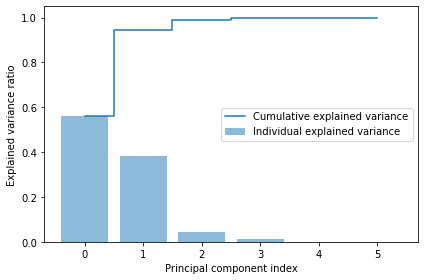

In [10]:
# requires scaled data

from sklearn.decomposition import PCA

pca = PCA(random_state=1)

# Determine transformed features
pca.fit(n_data_scaled[['Price', 'Case Diameter', 'Case Thickness', 'Band Widht', 'Item Weight', 'Water Resistant Depth']])

# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Choose minimum number of pc's to keep more thn 99% information
for n_components, eigenvalue in enumerate(cum_sum_eigenvalues):
    if eigenvalue > 0.99:
        best_n_components = n_components + 1
        print(f'For {best_n_components} features we have more than 99% information kept!')
        break

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='center right')
plt.tight_layout()
plt.show()


In [11]:
pca = PCA(n_components=best_n_components, random_state=1)

n_data_pca = pca.fit_transform(n_data_scaled) # output np.array
n_data_pca = pd.DataFrame(data=n_data_pca, columns=['pc_' + str(num+1) for num in range(best_n_components)])
n_data_pca.head()

,pc_1,pc_2,pc_3,pc_4
0,1264.589030,-120.190093,-49.626691,-76.059050
1,1272.874934,110.120349,247.018185,-10.141114
2,1321.862876,966.447676,-299.876118,-61.421342
3,1287.058003,403.397552,-269.497858,-57.519052
4,1245.010117,-226.513484,-29.316847,-55.524124


In [ ]:
# insert id column

n_data_pca.insert(0, 'id', n_data_scaled["id"])
n_data_pca.head()


## Hierarchical Clustering

In [ ]:
#-------------------------------hierarchical clustering--------------------
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(n_data_pca, method='ward'))


In [ ]:
#define the value of y, to prune the tree
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(n_data_pca, method='ward'))
plt.axhline(y=400, color='r', linestyle='--')

In [ ]:
from sklearn.cluster import AgglomerativeClustering

#define number of clusters
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')  


In [ ]:
#save the clusters for each element on a new table
cluster_table=cluster.fit_predict(n_data_scaled)
print(cluster_table)

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(n_data_scaled['Price'], n_data_scaled['Item Weight'], c=cluster.labels_) 

In [ ]:
#create a new dataframe with the new column Class (due to clustering)
clustered_data=n_data_scaled
clustered_data["Class"]=cluster_table

#reset index to use the dataframe in for loops
#clustered_data.reset_index(inplace=True)

clustered_data

In [ ]:
crosstab_class=pd.crosstab(index=clustered_data["Class"],columns='count')
print(crosstab_class)

#create a folder for each class. The name of the folder will be tha name of the class
for index in range(len(crosstab_class)):
    os.mkdir("dataset/"+str(index))

In [ ]:
# for cluster_index in range(len(clustered_data)):
#     print(clustered_data["Class"][cluster_index])

In [ ]:
import shutil

#create folders for each class and copy the corresponding images

original = 'dataset/images/'
target = 'dataset/'

for cluster_index in range(len(clustered_data)):
    count_id=0
    for data_index in range((len(data))):
        if clustered_data["id"][cluster_index]==data["id"][data_index]:
            try:
                shutil.copyfile(original+data["Image Name"][data_index], target+str(clustered_data["Class"][cluster_index])+"/"+data["Image Name"][data_index])
            except:
                print("Image Not Found:",data["Image Name"][data_index])
            count_id+=1
    print(count_id)

## Split dataset into training and test sets

In [ ]:
from os import walk
import random
import shutil

for index in range(len(crosstab_class)):
    im_dir="dataset/"+str(index)
    os.makedirs("dataset/split_data/train/"+str(index))
    os.makedirs("dataset/split_data/test/"+str(index))

    #create a list with the names of the images for each folder-class
    item_list=[]
    for (dirpath, dirnames, filenames) in walk(im_dir):
        item_list.extend(filenames)
        #print(len(item_list))
        break

    #shuffle the data to get a random sample
    random.shuffle(item_list)
    train_list=item_list[0:round(len(item_list)*0.7)] #70% of the data for training
    test_list=item_list[len(train_list):len(item_list)] #30% of the data for testing

    #copy the appropriate images to create the training and test sets
    for train_index in range(len(train_list)):
        shutil.copyfile(im_dir+"/"+train_list[train_index],"dataset/split_data/train/"+str(index)+"/"+ train_list[train_index])

    for test_index in range(len(test_list)):
        shutil.copyfile(im_dir+"/"+train_list[test_index],"dataset/split_data/test/"+str(index)+"/"+ test_list[test_index])

# Model

## Data Loader

In [12]:
import torch
import torchvision
import torchvision.transforms as transforms 
from torch.utils.data import Dataset, DataLoader
from skimage import io, transform
import cv2

c:\Users\pkatr\miniconda3\envs\featScraper\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
#testing the code
path="dataset/split_data/train"

im_name=[]
im_path=[]
im_class=[]

for filename in os.listdir(path):
   # print(filename)
   for image in os.listdir(path+"/"+str(filename)):
      # print(image)
      im_name.append(image)
      im_path.append(path+"/"+str(filename)+"/"+image)
      im_class.append(filename)


for image in im_path:
    img = cv2.imread(im_path[1])
    if img.shape!=(585, 342,3):
        print(img.shape)

In [31]:
class ForTheWatch(Dataset):

    def __init__(self, root_dir, transform=None):
        
        self.root_dir = root_dir
        self.transform = transform

        im_name=[]
        self.im_path=[]
        self.im_class=[]

        for filename in os.listdir(root_dir):
        # print(filename)
            for image in os.listdir(root_dir+"/"+str(filename)):
                # print(image)
                im_name.append(image)
                self.im_path.append(root_dir+"/"+str(filename)+"/"+image)
                self.im_class.append(int(filename))

        

    def __len__(self):
        return len(self.im_class)

    def __getitem__(self, idx):
        
        img=cv2.imread(self.im_path[idx])

        if self.transform:
            img=self.transform(img)

        return (img,self.im_class[idx])

## Load and Normalize

In [32]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Resize((292,171)),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

# trainset = torchvision.datasets.CIFAR10(root='', train=True,
#                                         download=True, transform=transform)

trainset=ForTheWatch(root_dir="dataset/split_data/train",transform=transform)

#print(trainset.im_path)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True)

# testset = torchvision.datasets.CIFAR10(root='./data', train=False,
#                                        download=True, transform=transform)

testset=ForTheWatch(root_dir="dataset/split_data/test",transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False)

classes = tuple(str(num_class) for num_class in range(len(crosstab_class)))

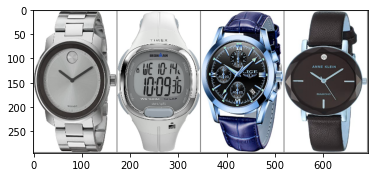

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
# print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## Define the CNN

In [18]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(43680, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

## Loss function and optimizer


In [19]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## Train the network

### Train in GPU

In [20]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [21]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=43680, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [42]:
import matplotlib.pyplot as plt
import seaborn as sb

import time

from datetime import timedelta
from tqdm import tqdm

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from collections import defaultdict
import torch.optim as optim

net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

net.to(device)

history = {'train_loss':[],
           'valid_loss':[]}
           
epochs = 25

start = time.time()
for epoch in range(epochs):

    training_loss = 0.0
    net.train()
    
    with tqdm(trainloader, unit="batch") as tepoch:
        for bx, (inputs, labels) in enumerate(tepoch, 0):
            
            tepoch.set_description(f'Epoch: {epoch+1}/{epochs}')

            inputs, labels = inputs.to(device), labels.to(device)
            
            # predictions
            outputs = net(inputs)
            
            # Backpropagation
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            # Metric
            training_loss += loss.item()
            
            # Update progress bar
            progress_loss = training_loss / ((bx+1) * batch_size)
            tepoch.set_postfix(loss=progress_loss)
            
    epoch_loss = training_loss/len(trainset)
    history['train_loss'].append(epoch_loss)

    valid_loss = 0.0
    net.eval()     # Optional when not using Model Specific layer
    for inputs, labels in testloader:

        inputs, labels = inputs.to(device), labels.to(device)
            
        outputs = net(inputs)
        loss = criterion(outputs,labels)

        valid_loss += loss.item()

    epoch_loss = valid_loss/len(testset) 
    history['valid_loss'].append(epoch_loss)  

end = time.time()
print('-----------------------------------------------')
print('[System Complete: {}]'.format(timedelta(seconds=end-start)))

cuda:0


Epoch: 25/25: 100%|██████████| 169/169 [00:07<00:00, 22.50batch/s, loss=0.0162]


-----------------------------------------------
[System Complete: 0:04:14.258243]


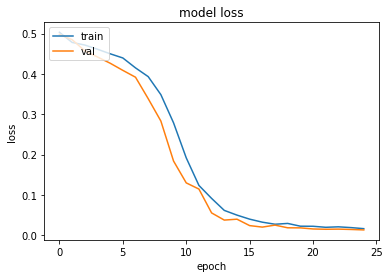

In [43]:
# summarize history for accuracy
# plt.plot(history['accuracy'])
# plt.plot(history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# summarize history for loss
plt.plot(history['train_loss'])
plt.plot(history['valid_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [46]:
print(history['valid_loss'])

[0.497927435570293, 0.48489439818594193, 0.4572805373205079, 0.44195980413092506, 0.4264718372788694, 0.40876305372350746, 0.39175396660963696, 0.33858318461312187, 0.28304990950144, 0.1839025259638826, 0.1297648704300324, 0.11441266699209034, 0.05528244191534921, 0.03750726319651676, 0.03973994463578694, 0.023812891508972218, 0.020111300565481036, 0.025042572163553385, 0.01838600816861597, 0.018212868264198632, 0.015490682511376185, 0.014749173791222524, 0.015100392488723932, 0.014259855184314397, 0.013132633847994334]


## Save the model

In [47]:
PATH = 'saved_models/watch_net_tloss0.0162_vloss0.0131.pth'
torch.save(net.state_dict(), PATH)

## Test the network on the test data

In [66]:
dataiter = iter(testloader)

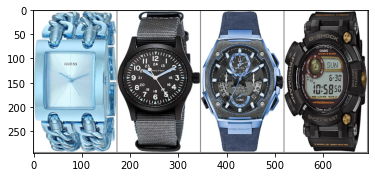

GroundTruth:  1     2     2     2    


In [109]:

images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [93]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [110]:
outputs = net(images)

In [111]:
classes = tuple(str(num_class) for num_class in range(10))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  1     2     2     2    


In [56]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 97 %


In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')